## MÉTODOS NUMÉRICOS II

### Prueba Práctica 3 - 05/06/2023

Alumno: José Alberto Hoces Castro

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline
from time import perf_counter as now

Se nos pide resolver el PVI $y'(t) = \frac{t-y(t)}{2}$ para $t \in [0,1]$ y $y(0)=1$ utilizando los métodos de Euler explícito (Adam-Bashfort para k = 1), Adam-Bashfort para k = 2 y Adam-Bashfort para k = 3. Luego, los compararemos entre sí y con la solución exacta. Por ello, vamos a definir la función y obtener su solución exacta:

In [2]:
a, b = 0, 1
ya = 1
AB1, AB2, AB3 = [], [], []
t, y0, z = sp.symbols('t, y_0,  z')

def f(t,z):
    return (t-z)/float(2)

In [3]:
# Definimos y como una función simbólica
y = sp.Function('y')

# Declaramos la EDO
edo = y(t).diff(t)-f(t,y(t))

# La igualamos a 0
sp.Eq(edo,0)

# Resolvemos simbólicamente la EDO
edo_sol = sp.dsolve(edo)

# Imponemos las condiciones iniciales
ics = {y(0): y0}

# De esta manera haríamos la sustituciones correspondientes
edo_sol.rhs.subs(t, 0),edo_sol.lhs.subs(t, 0).subs(ics)

# Ecuación asociada al PVI
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))

# Solución del PVI
CI_sol = sp.solve(CI_eq)

# Única solución exacta de nuestro PVI 
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})

In [4]:
sol_exacta

1.0*t - 2.0 + 3.0*exp(-0.5*t)

In [5]:
# Ahora almacenaremos las soluciones exactas en un array para posteriores comparaciones:

y_x = sp.lambdify(t, sol_exacta, 'numpy')
xx = np.linspace(a,b,100)

A continuación vamos a definir los 3 métodos que se nos piden:

In [6]:
def Eulerexplicitointegrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n],Y[n]))
    return np.array(X),np.array(Y)

In [7]:
def AB2integrate(F,x0,y0,xfinal,N):
    
    def AB2(F,x0,y0,y1,h):
        return (3*F(x0+h,y1)-F(x0,y0))/2    
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n+1] + h*AB2(F,X[n],Y[n],Y[n+1],h))
    return np.array(X),np.array(Y)

In [8]:
def AB3integrate(F,x0,y0,xfinal,N):
    
    def AB3(F,x0,y0,y1,y2,h):
        return (23*F(x0+2*h,y2)-16*F(x0+h,y1) + 5*F(x0,y0))/12    
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0)
    y2 = y1 + h*(3*F(x0+h,y1)-F(x0,y0))/2
    Y = [y0,y1,y2]
    for n in range(N-2):
        Y.append(Y[n+2] + h*AB3(F,X[n],Y[n],Y[n+1],Y[n+2],h))
    return np.array(X),np.array(Y)

Una vez tenemos los métodos programados, procedemos a realizar las comparaciones. Como nos pide que las calculemos con $h=0.1$, he definido la función según $N$ que es el número de iteraciones que queremos  para conseguir dicho $h$. Como el intervalo es el $[0,1]$, necesitaremos $N  = \frac{1-0}{h} = 10$ iteraciones. 

In [9]:
N = 10
errorEulerexplicito, errorAB2, errorAB3 = ['Error max Euler explícito'], ['Error max Adam-Bashfort 2'], ['Error max Adam-Bashfort 3']

AB1 = {'xx': Eulerexplicitointegrate(f,a,ya,b,N)[0], 'yy': Eulerexplicitointegrate(f,a,ya,b,N)[1]}
AB2 = {'xx': AB2integrate(f,a,ya,b,N)[0], 'yy': AB2integrate(f,a,ya,b,N)[1]}
AB3 = {'xx': AB3integrate(f,a,ya,b,N)[0], 'yy': AB3integrate(f,a,ya,b,N)[1]}
errorEulerexplicito.append(max(abs(AB1['yy']-y_x(AB1['xx']))))
errorAB2.append(max(abs(AB2['yy']-y_x(AB2['xx']))))
errorAB3.append(max(abs(AB3['yy']-y_x(AB3['xx']))))
errores1 = abs(AB1['yy']-y_x(AB1['xx']))
errores2 = abs(AB2['yy']-y_x(AB2['xx']))
errores3 = abs(AB3['yy']-y_x(AB3['xx']))

A continuación imprimimos los resultados:

In [10]:
print(tabulate([errorEulerexplicito, errorAB2, errorAB3]))
errorEulerexplicito, errorAB2, errorAB3

-------------------------  ----------
Error max Euler explícito  0.0233812
Error max Adam-Bashfort 2  0.00368827
Error max Adam-Bashfort 3  0.00368827
-------------------------  ----------


(['Error max Euler explícito', 0.023381161422763586],
 ['Error max Adam-Bashfort 2', 0.003688273502141959],
 ['Error max Adam-Bashfort 3', 0.003688273502141959])

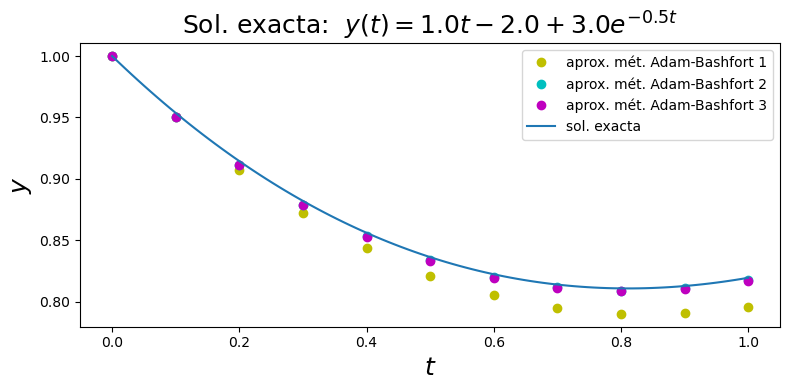

In [11]:
# A continuación graficamos la solución exacta junto con las 3 aproximaciones halladas

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(AB1['xx'],AB1['yy'], 'yo',label = "aprox. mét. Adam-Bashfort 1".format(N))
ax.plot(AB2['xx'],AB2['yy'], 'co',label = "aprox. mét. Adam-Bashfort 2".format(N))
ax.plot(AB3['xx'],AB3['yy'], 'mo',label = "aprox. mét. Adam-Bashfort 3".format(N))
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()

A la vista de los resultados, Adam-Bashfort 2 y Adam-Bashfort 3 tienen la misma precisión en cuanto al máximo de los errores en valor absoluto, así que en este caso usaríamos indistintamente uno u otro. Como último criterio, vamos a hallar el error en valor absoluto en el extremo derecho del intervalo:

In [12]:
errores1[N]

0.023381161422763586

In [13]:
errores3[N]

0.002282305826566189

No sé por qué no se me evalúan los errores de AB2 en el extremo derecho, pero para concluir cuál es mejor usar, afirmaría que AB3 ya que hemos visto en teoría que tiene un orden de exactitud mayor que AB1 y AB2. En otros casos, y para valores distintos de h sí se apreciaría la diferencia entre AB2 y AB3.